# Lets Implement Credit Card Fraud Detection Using Cascading multiple classifiers

Import Section 


In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,log_loss,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import operator
import copy
import json
import pickle
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.combine import SMOTETomek
from sklearn.utils import resample

Lets work on the cancer dataset

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!mkdir creditcardfraud
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip -d creditcardfraud

Saving kaggle.json to kaggle.json
100% 66.0M/66.0M [00:00<00:00, 237MB/s]
100% 66.0M/66.0M [00:00<00:00, 224MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcardfraud/creditcard.csv  


Lets Load the dataset

In [2]:
creditdata = pd.read_csv('/content/creditcardfraud/creditcard.csv')
creditdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
creditdata.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Observations:

* Looks like columns V1 to V28 are PCA columns with best variance 
* columns Time and amount are in seconds and dollors respectively and hence need standardization
* Class is the dependent variable

### lets see the balance of the data

In [4]:
print(creditdata.shape)
creditdata.Class.value_counts()

(284807, 31)


0    284315
1       492
Name: Class, dtype: int64

* we can see data is highly imbalanced
* lets use smote tomek links to stabilise the data

In [5]:
X = creditdata.drop(['Class'],axis =1)
y = creditdata[['Class']]
print(X.shape)
print(y.shape)

(284807, 30)
(284807, 1)


# Note: Issue with compatibility of sklearn and imblearn 
## smote tomek takes ages for runiing with sklearn latest versions hence 
## install scikit-learn==0.23 and perform smotetomek and save the X and y  
## upgrade the scikit-learn to latest and proced

Refer : https://github.com/scikit-learn-contrib/imbalanced-learn/issues/817

In [6]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
!pip install scikit-learn==0.23

In [7]:
smt = SMOTETomek(random_state=42, n_jobs = -1)
X, y = smt.fit_resample(X, y)
with open('X','wb') as file:
  pickle.dump(X,file)
with open('y','wb') as file:
  pickle.dump(y,file)

In [ ]:
!pip install --upgrade scikit-learn

In [117]:
with open('/content/X','rb') as file:
  X = pickle.load(file)
with open('/content/y','rb') as file:
  y = pickle.load(file)

print(X.shape)
print(y.shape)

(567562, 30)
(567562, 1)


# lets only take 15000 points for time complexity

In [118]:
X, y = resample(X, y, n_samples=15000,random_state=0)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
print(X.shape)
print(y.shape)
print(y.Class.value_counts())

(15000, 30)
(15000, 1)
1    7577
0    7423
Name: Class, dtype: int64


# lets divide train and test datasets

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(12000, 30)
(3000, 30)
(12000, 1)
(3000, 1)


# lets apply standardisation on time and amount columns

In [120]:
scalar_time = StandardScaler()
X_train.Time = scalar_time.fit_transform(np.array(X_train.Time).reshape(-1,1))
X_test.Time = scalar_time.transform(np.array(X_test.Time).reshape(-1,1))
scalar_amount = StandardScaler()
X_train.Amount = scalar_amount.fit_transform(np.array(X_train.Amount).reshape(-1,1))
X_test.Amount = scalar_amount.transform(np.array(X_test.Amount).reshape(-1,1))

In [121]:
def metrics(classfier,X_test,y_test):
  y_pred = classfier.predict(X_test)
  y_prob = classfier.predict_proba(X_test)[:,[1]]
  accuracy = accuracy_score(y_test,y_pred)
  rocauc = roc_auc_score(y_test,y_prob)
  logloss = log_loss(y_test,y_prob)
  f1score = f1_score(y_test,y_pred)
  print("accuracy score :",accuracy)
  print("f1 score :",f1score)
  print("auc score :",rocauc)
  print("log loss :",logloss)
  print('classification report : \n', classification_report(y_test,y_pred))
  print('*********** confusion matrx ***********')
  sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'Blues',fmt = 'g')
  plt.show()
  return y_pred,classfier.predict_proba(X_test)

# now lets train two models 

## let our first model is bagged Decision_tree

In [43]:
Dt_clf = DecisionTreeClassifier(max_features = 'auto',random_state = 42)
param_grids = {'base_estimator__criterion': ['gini','entropy'],'base_estimator__max_depth' : [15,20,25,30,35,40],'max_features' : [0.4,0.5,0.6],'n_estimators':[25,28,30,32,35],'max_samples' : [0.5,0.6,0.7]}
Dt_classif = GridSearchCV(estimator = BaggingClassifier(Dt_clf),param_grid = param_grids,cv = 5, scoring = 'accuracy',verbose = 2)
Dt_classif.fit(X_train,y_train)
Dt_classif.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=28; total time=   0.3s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=15,
                                                        max_features='auto',
                                                        random_state=42),
                  max_features=0.6, max_samples=0.7, n_estimators=25)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=15,
                                                        max_features='auto',
                                                        random_state=42),
                  max_features=0.6, max_samples=0.7, n_estimators=25)

In [122]:
Dt_classif = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='auto', random_state=42), max_features=0.6, max_samples=0.7, n_estimators=25)
Dt_classif.fit(X_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=15,
                                                        max_features='auto',
                                                        random_state=42),
                  max_features=0.6, max_samples=0.7, n_estimators=25)

accuracy score : 0.9990833333333333
f1 score : 0.9990920346677673
auc score : 0.9999991110161874
log loss : 0.020924367913443872
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5938
           1       1.00      1.00      1.00      6062

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

*********** confusion matrx ***********


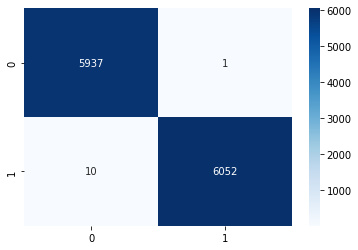

In [123]:
Dt_classif_pred,Dt_classif_prob = metrics(Dt_classif,X_train,y_train)

# lets take records which are said to be genuine with less than 90% probability
## lets build a model with those points which have probability less than 90 % 
### lets build a GBDT

In [124]:
Dt_classif_prob[:,[0]][Dt_classif_prob[:,[0]] < 0.90].shape

(6357,)

In [126]:
X_train_level2 = X_train.iloc[np.where(Dt_classif_prob[:,[0]] < 0.90)[0],:]
y_train_level2 = y_train.iloc[np.where(Dt_classif_prob[:,[0]] < 0.90)[0],:]
print(X_train_level2.shape)
print(y_train_level2.shape)

(6357, 30)
(6357, 1)


With the above records lets create model 2 which is gbdt

In [129]:
gbdt_clasif = GradientBoostingClassifier(random_state = 42)
param_grids = {'loss' : ['exponential'],'learning_rate' : [0.1,0.3,0.6,0.9],'n_estimators':[80,90,100,110]}#,'criterion':['friedman_mse','squared_error','mse']}
gbdt_clasif = GridSearchCV(estimator = gbdt_clasif,param_grid = param_grids,cv = 5, scoring = 'accuracy', verbose = 2)
gbdt_clasif.fit(X_train_level2,y_train_level2)
gbdt_clasif.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.1, loss=exponential, n_estimators=80; total time=   4.0s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=80; total time=   3.6s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=80; total time=   3.6s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=80; total time=   3.6s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=80; total time=   3.5s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=90; total time=   4.0s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=90; total time=   4.0s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=90; total time=   4.0s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=90; total time=   4.0s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=90; total time=   4.0s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100; total time=   4.5s
[CV] END learning_rate=0.1, loss=exp

GradientBoostingClassifier(learning_rate=0.6, loss='exponential',
                           n_estimators=110, random_state=42)

accuracy score : 1.0
f1 score : 1.0
auc score : 1.0
log loss : 4.158498693754372e-05
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00      6062

    accuracy                           1.00      6357
   macro avg       1.00      1.00      1.00      6357
weighted avg       1.00      1.00      1.00      6357

*********** confusion matrx ***********


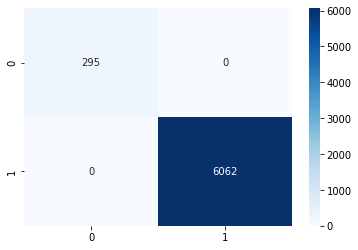

In [130]:
gbdt_clasif_m2 = GradientBoostingClassifier(learning_rate=0.6, loss='exponential',random_state=42,n_estimators=110)
gbdt_clasif_m2.fit(X_train_level2,y_train_level2)
gbdt_clasif_m2_pred,gbdt_clasif_m2_prob = metrics(gbdt_clasif_m2,X_train_level2,y_train_level2)

# Now lets test this cascaded model

accuracy score : 0.991
f1 score : 0.9910328794420458
auc score : 0.9993137091486927
log loss : 0.0546868513544931
classification report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1485
           1       1.00      0.98      0.99      1515

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

*********** confusion matrx ***********


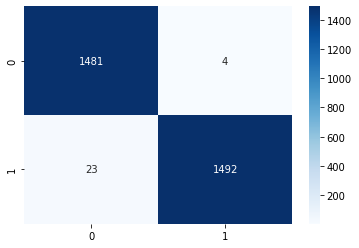

In [131]:
Dt_classif_m1_pred,Dt_classif_m1_prob = metrics(Dt_classif,X_test,y_test)

# lets take records which are said to be genuine with less than 90% probability from test set and send it to the GBDT model

In [132]:
X_test_level2 = X_test.iloc[np.where(Dt_classif_m1_prob[:,[0]] < 0.90)[0],:]
y_test_level2 = y_test.iloc[np.where(Dt_classif_m1_prob[:,[0]] < 0.90)[0],:]
print(X_test_level2.shape)
print(y_test_level2.shape)

(1704, 30)
(1704, 1)


In [111]:
final_pred = Dt_classif_m1_pred.copy()

accuracy score : 0.9706572769953051
f1 score : 0.9837239583333334
auc score : 0.9979080447727313
log loss : 0.08999965394151722
classification report : 
               precision    recall  f1-score   support

           0       0.97      0.76      0.85       189
           1       0.97      1.00      0.98      1515

    accuracy                           0.97      1704
   macro avg       0.97      0.88      0.92      1704
weighted avg       0.97      0.97      0.97      1704

*********** confusion matrx ***********


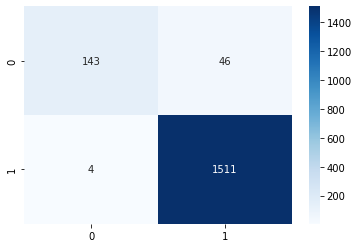

In [133]:
gbdt_clasif_m2_pred,gbdt_clasif_m2_prob = metrics(gbdt_clasif_m2,X_test_level2,y_test_level2)

we are taking the model 2 prediction for those recors where model 1 prediction probability is less than 90 %

In [135]:
final_pred[np.where(Dt_classif_m1_prob[:,[0]] < 0.90)[0]] = gbdt_clasif_m2_pred
final_pred

array([1, 0, 0, ..., 0, 0, 0])

accuracy score : 0.9833333333333333
f1 score : 0.9837239583333334
classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1485
           1       0.97      1.00      0.98      1515

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

*********** confusion matrx ***********


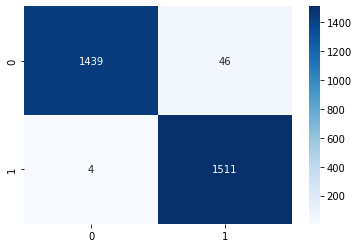

In [136]:
accuracy = accuracy_score(y_test,final_pred)
f1score = f1_score(y_test,final_pred)
print("accuracy score :",accuracy)
print("f1 score :",f1score)
print('classification report : \n', classification_report(y_test,final_pred))
print('*********** confusion matrx ***********')
sns.heatmap(confusion_matrix(y_test,final_pred),annot = True, cmap = 'Blues',fmt = 'g')
plt.show()
